In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_d4.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_b5.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_ea.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_a3.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_9a.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_98.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_ee.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_ca.jpg
/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_88.jpg
/kaggle/input/ident

In [6]:
from PIL import Image
import os
import numpy as np

image_size = (128, 128)
data_dir = "/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset"

X = []
y = []
class_names = sorted(os.listdir(data_dir))


for label, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_path):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).resize(image_size).convert('RGB')
            img_array = np.array(img) / 255.0  
            X.append(img_array)
            y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int32)


TypeError: 'tuple' object is not callable

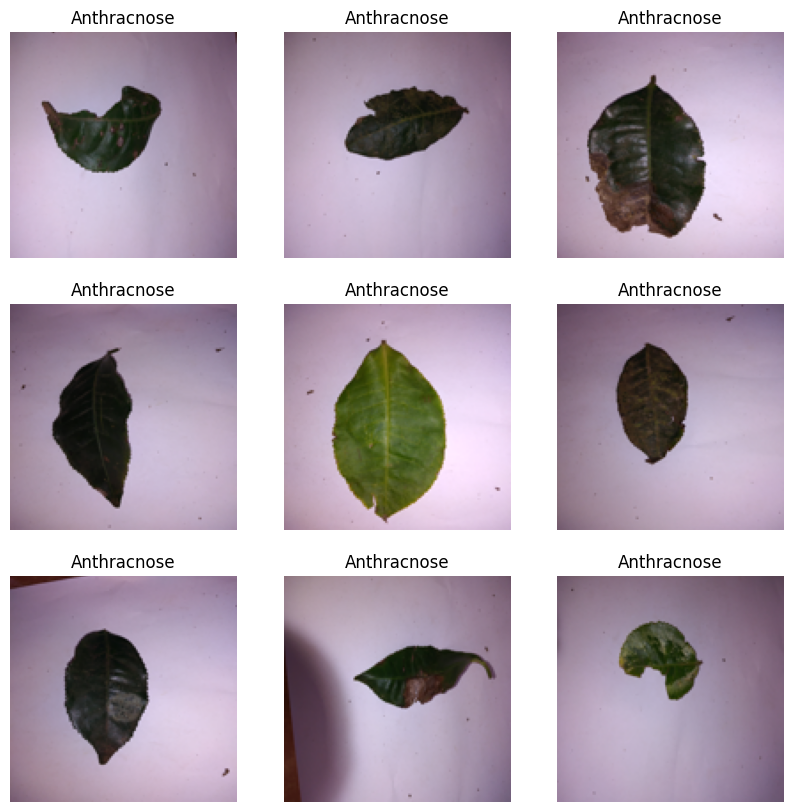

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title(class_names[y[i]])
    plt.axis("off")

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


In [24]:
print("Dataset shape:", X.shape) 
print("Dataset shape:", y.shape) 
print(class_names) 


Dataset shape: (885, 128, 128, 3)
Dataset shape: (885,)
['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 449ms/step - accuracy: 0.2445 - loss: 2.0346 - val_accuracy: 0.4068 - val_loss: 1.3825
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 406ms/step - accuracy: 0.5458 - loss: 1.0720 - val_accuracy: 0.6045 - val_loss: 1.0624
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - accuracy: 0.6825 - loss: 0.7926 - val_accuracy: 0.5367 - val_loss: 1.1905
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - accuracy: 0.7885 - loss: 0.5314 - val_accuracy: 0.6667 - val_loss: 0.9330
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 405ms/step - accuracy: 0.9166 - loss: 0.3165 - val_accuracy: 0.7006 - val_loss: 0.8688
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.9226 - loss: 0.2737 - val_accuracy: 0.6723 - val_loss: 1.0076
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 408ms/step - accuracy: 0.9444 - loss: 0.1900 - val_accuracy: 0.7345 - val_loss: 0.9077
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 410ms/step - accuracy: 0.9683 - loss: 0.1153 - val_accuracy: 0

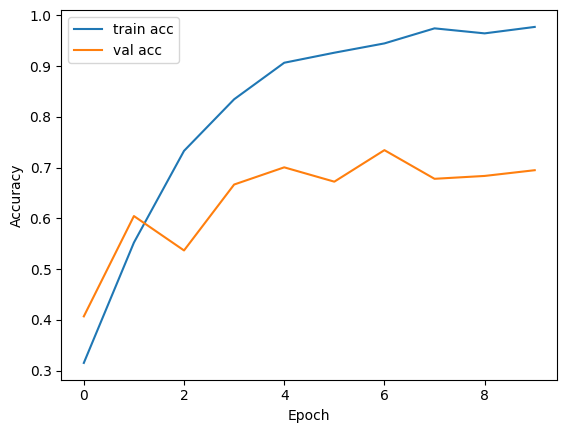

In [30]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


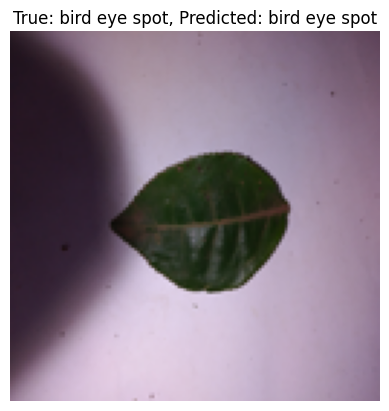

In [34]:
import matplotlib.pyplot as plt
import numpy as np

index = 30  # pick any image index
img = X_val[index]
true_label = y_val[index]

# CNN expects batch dimension → (1, 128, 128, 3)
img_batch = np.expand_dims(img, axis=0)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions[0])

# Get class name (if you have class_names list)
true_class_name = class_names[true_label]
predicted_class_name = class_names[predicted_class]

plt.imshow(img)
plt.title(f"True: {true_class_name}, Predicted: {predicted_class_name}")
plt.axis("off")
plt.show()
